# Notebook in progress

---------------------------------------------------------------------------------------------------------------

# Predicting wine quality using machine learning

The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

We're going to have the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Can we predict the wine quality based on the data?

## 2. Data

Available on Kaggle: https://www.kaggle.com/yasserh/wine-quality-dataset

## 3. Evaluation

* Understand the Dataset & cleanup (if required).
* Build classification models to predict the wine quality.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.
> Since the classes are imbalanced we'll look at : **Confusion Matrix, Precision, Recall & F1-score**

## 4. Features

This is where you'll get different information about each of the features in your data.

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

#### Import libraries

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# we want our plots to appear inside the notebook
%matplotlib inline

# For oversampling
from imblearn.over_sampling import SMOTE

# Models from Scikit-Learn


# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## 1 - Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [8]:
df_quality = df["quality"]
df_quality.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

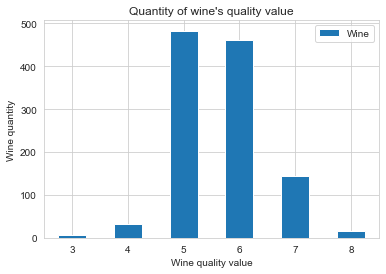

In [9]:
df_quality_counts = pd.DataFrame({"Wine": df.quality.value_counts().sort_index()})
df_quality_counts.plot(kind='bar', title="Quantity of wine's quality value")

plt.xticks(rotation=0)
plt.xlabel("Wine quality value")
plt.ylabel("Wine quantity");

In [10]:
df_features = df.drop(columns=['Id', 'quality'], axis=1)
df_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
def features_viz(feature_col):
        plt.figure(figsize=(15,5))
        
        plt.subplot(2,2,1)
        plt.title(f'Histogram of {feature_col}')
        df[feature_col].plot(kind='hist')
        plt.xlabel(f'{feature_col}')
        
        plt.subplot(2,2,2)
        plt.title(f'Density plot of {feature_col}')        
        sns.kdeplot(df[feature_col])
        
        plt.subplot(3,1,3)
        plt.title(f'Box plot of {feature_col}')
        sns.boxplot(df[feature_col])

#### Check outliers & normal distribution

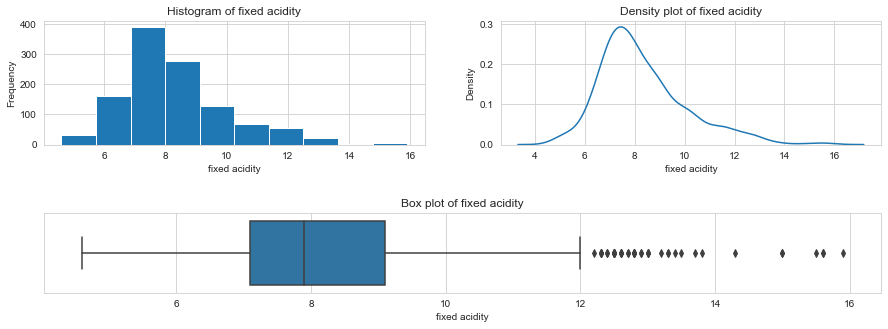

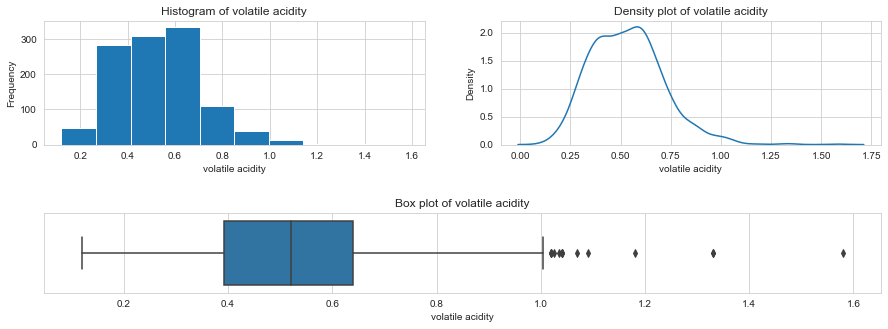

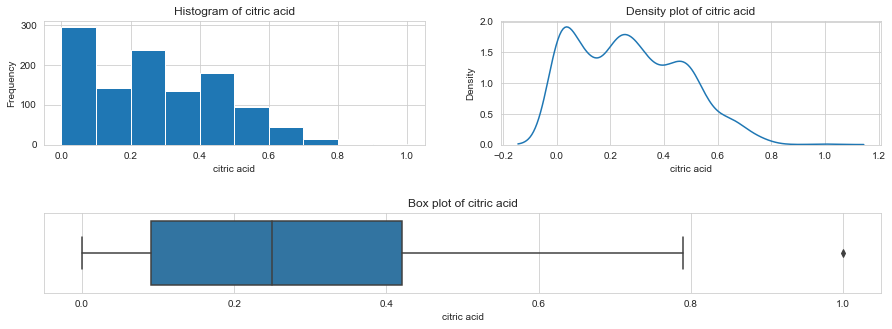

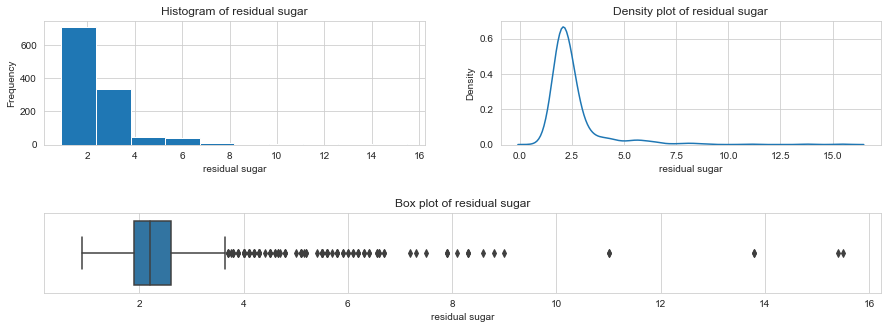

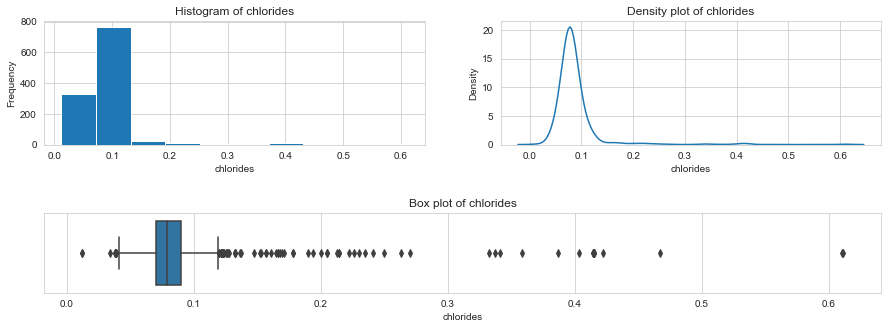

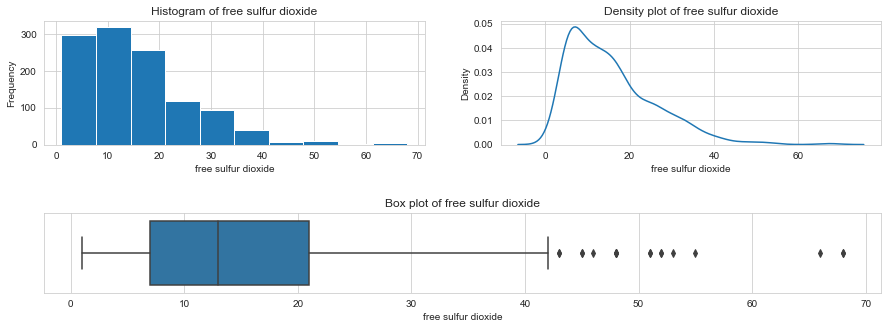

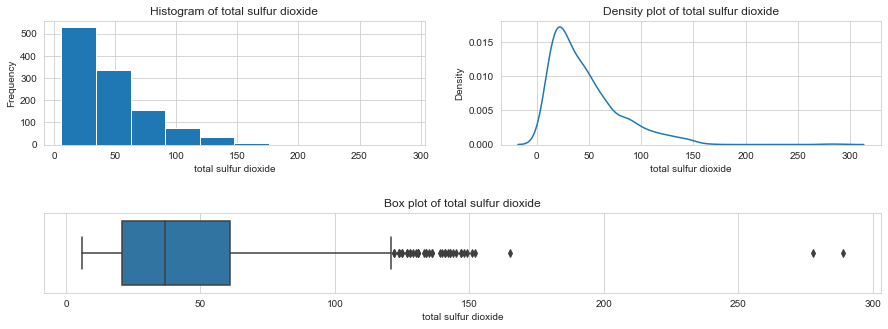

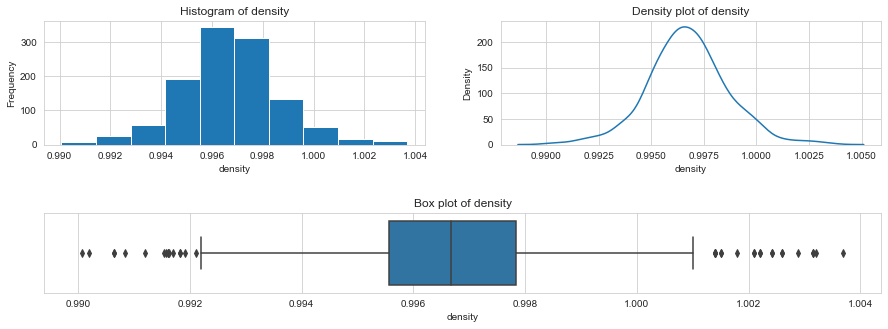

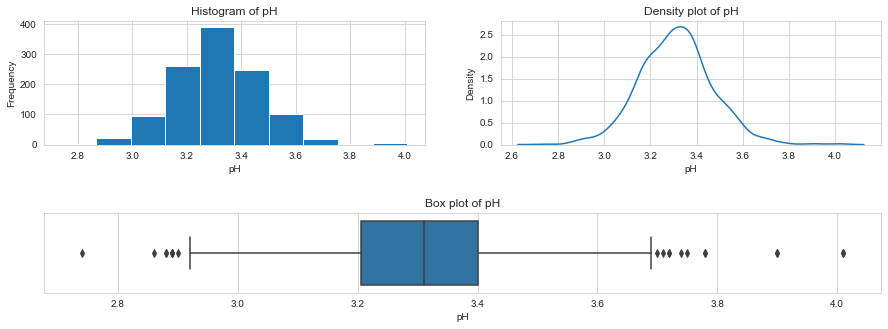

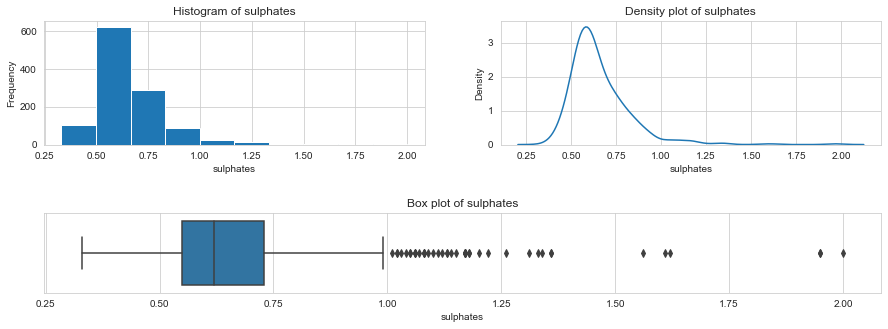

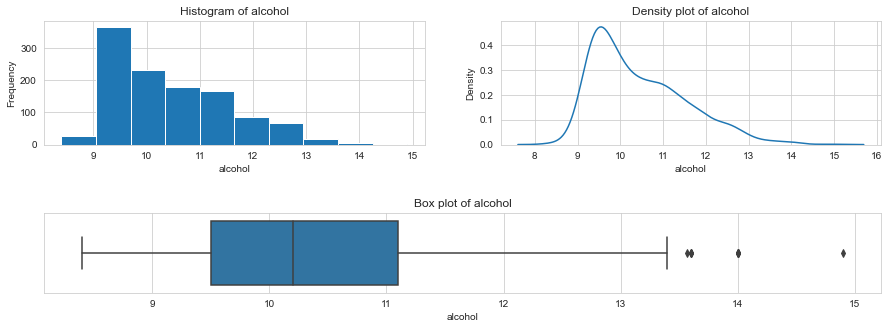

In [12]:
for i in df_features:
    features_viz(i)

Faire 3 catégories de vins :
* qualité 3-4 = mauvais
* qualité 5-6 = normal
* qualité 7-8 = bon

### Combien dans chaque catégorie ?

In [13]:
df_quality.value_counts().sort_index()

3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

In [14]:
df_bad_wine = df_quality[df_quality == 3].value_counts().sum() + df_quality[df_quality == 4].value_counts().sum()
df_bad_wine

39

In [15]:
df_normal_wine = df_quality[df_quality == 5].value_counts().sum() + df_quality[df_quality == 6].value_counts().sum()
df_normal_wine

945

In [16]:
df_good_wine = df_quality[df_quality == 7].value_counts().sum() + df_quality[df_quality == 8].value_counts().sum()
df_good_wine

159

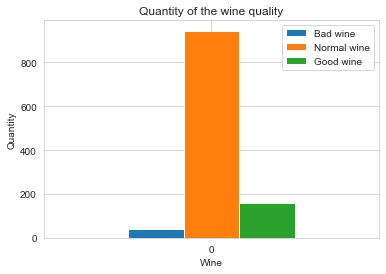

In [17]:
df_quality_test_good_bad = pd.DataFrame({'Bad wine': df_bad_wine,
                                         'Normal wine': df_normal_wine,
                                         'Good wine': df_good_wine}, index=[0])

df_quality_test_good_bad.plot(kind='bar', title="Quantity of the wine quality")

plt.xticks(rotation=0)
plt.xlabel("Wine")
plt.ylabel("Quantity");

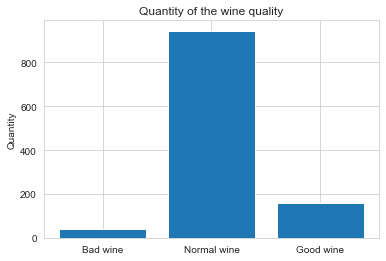

In [18]:
df_quality_test_good_bad_2 = {'Bad wine': df_bad_wine,
                              'Normal wine': df_normal_wine,
                              'Good wine': df_good_wine}
fig, ax = plt.subplots()
ax.bar(df_quality_test_good_bad_2.keys(), df_quality_test_good_bad_2.values())
ax.set(title="Quantity of the wine quality",
       ylabel="Quantity");

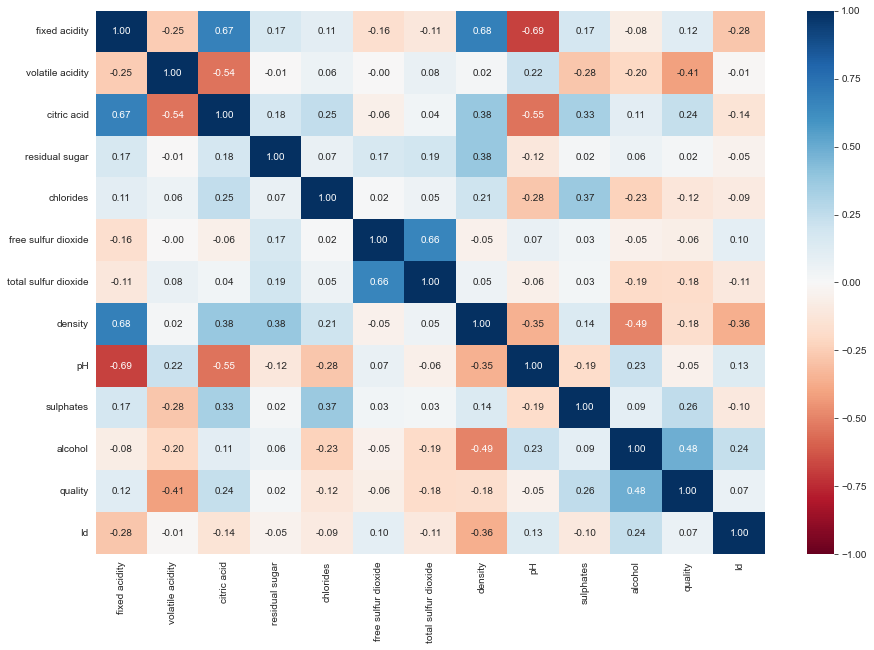

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 cmap="RdBu",
                 fmt=".2f",
                 vmin=-1,
                 vmax=1)

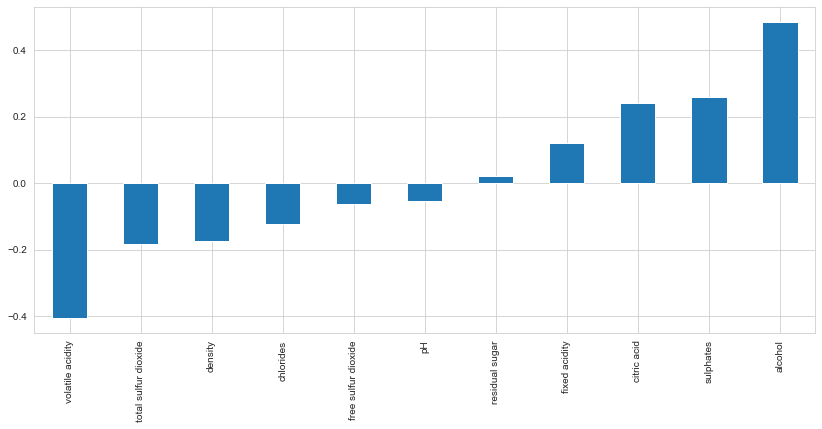

In [20]:
plt.figure(figsize=(14,6))
corr = df.corr()['quality'].sort_values()
corr.drop(['quality', 'Id']).plot(kind='bar');

# A voir si je garde ou pas

## Analysis results

#### The quality of the wine :

The quality of the wine is very imbalanced (mainly 5 and 6). The quality goes from 3 to 8. According to the correlation matrix, there is almost no correlation with quality and the:
    * free sulfur dioxide
    * pH
    * residual sugar
    
Lots of features have outliers. In order to deal with them, I'm going to use log transformation: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

https://www.kaggle.com/emirslspr/wine-quality-eda-ml

https://www.kaggle.com/vitorgamalemos/wine-classification-eda-xgboost-gridsearch

https://www.kaggle.com/qusaybtoush1990/wine-quality

https://www.kaggle.com/arnavr10880/winedataset-eda-ml

skew() function calculates the skewness of the data set.

* skewness = 0 : normally distributed
* skewness > 0 : more weight in the left tail of the distribution
* skewness < 0 : more weight in the right tail of the distribution

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [21]:
df_features.skew().sort_values()

density                 0.102395
pH                      0.221138
citric acid             0.371561
volatile acidity        0.681547
alcohol                 0.863313
fixed acidity           1.044930
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
residual sugar          4.361096
chlorides               6.026360
dtype: float64

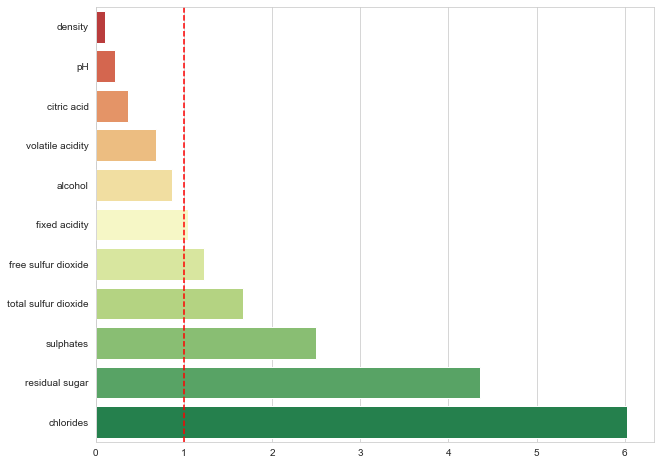

In [22]:
plt.figure(figsize=(10,8))
skewness = df_features.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index, palette='RdYlGn', dodge=False)
plt.axvline(x=1, color='r', linestyle='--');

In [23]:
skew_results = df_features.skew() > 1
b=0
features_skewed = []

for i in df_features:
    if skew_results.iloc[b] == True:
        print(i)
        features_skewed.append(df_features[i])
        b+=1
    else:
        b+=1

fixed acidity
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
sulphates


In [24]:
def before_after_log_transf(param, feature_title):
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,2,1)
    sns.distplot(param).set(title=f'{feature_title} before log tranformation')
    
    plt.subplot(2,2,2)
    sns.distplot(np.log(param)).set(title=f'{feature_title} after log tranformation')

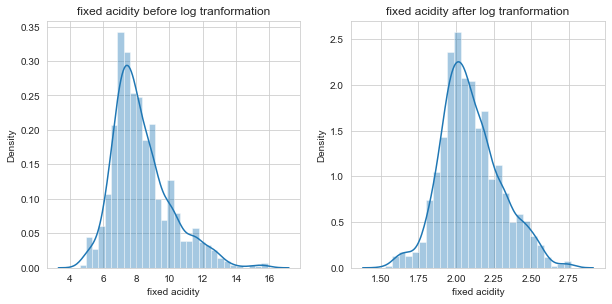

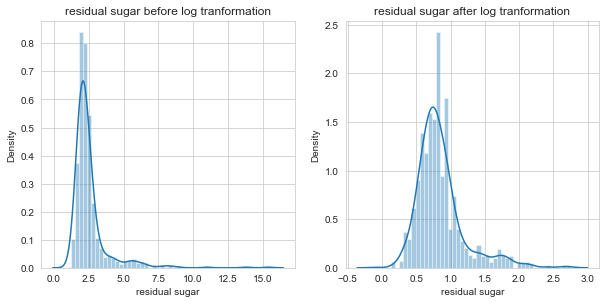

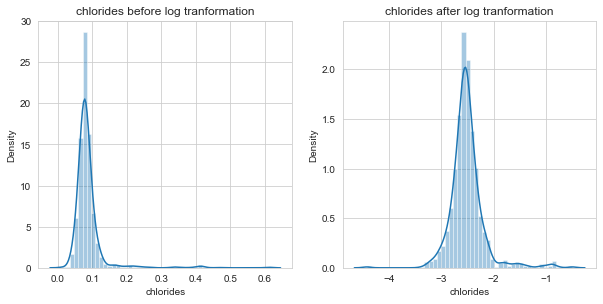

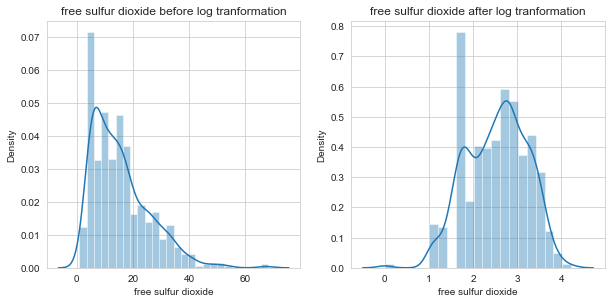

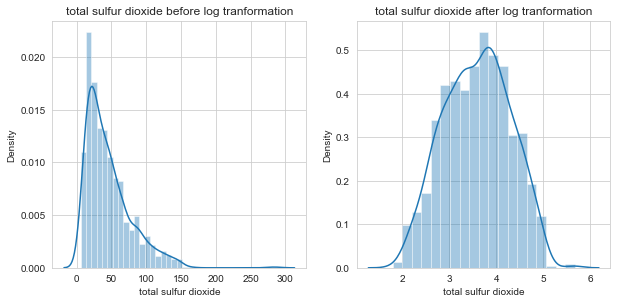

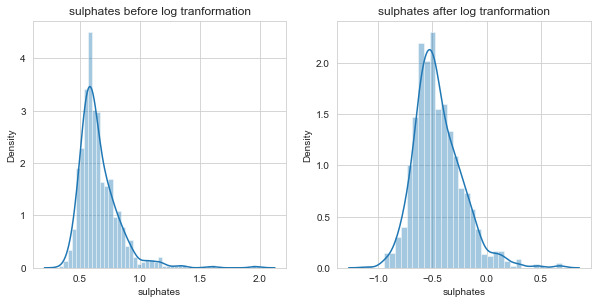

In [25]:
o=0
for i in features_skewed:
    before_after_log_transf(features_skewed[o], features_skewed[o].name)
    o+=1

In [26]:
df_features["fixed acidity"] = np.log(df_features["fixed acidity"])
df_features["residual sugar"] = np.log(df_features["residual sugar"])
df_features["chlorides"] = np.log(df_features["chlorides"])
df_features["free sulfur dioxide"] = np.log(df_features["free sulfur dioxide"])
df_features["total sulfur dioxide"] = np.log(df_features["total sulfur dioxide"])
df_features["sulphates"] = np.log(df_features["sulphates"])

### How to deal with imbalanced classes ?

Let's try both techniques:

 * Undersampling
 * Oversampling

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### Undersampling data

# 2 - Modeling

### Oversampling using SMOTE (Synthetic Minority Oversampling Technique)

In order to avoid errors, let's install the latest version of scikit-learn and imbalanced-learn.

In [27]:
# Add the latest version of scikit-learn
# pip install -U scikit-learn

In [28]:
# Add the latest version of imbalanced-learn
# pip install -U imbalanced-learn

In [29]:
# Check the version to avoid dependencies issues
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print('Imblearn', imblearn.__version__)

Python 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
NumPy 1.19.2
Scikit-Learn 0.24.2
Imblearn 0.8.1


In [30]:
# A tester sans pour le moment
#from imblearn.over_sampling import RandomOverSampler

In [31]:
# Separate input features and target
X = df_features
y = df_quality

In [32]:
df_quality.value_counts().sort_index()

3      6
4     33
5    483
6    462
7    143
8     16
Name: quality, dtype: int64

In [33]:
#Do oversampling
strategy={3:460,4:460,7:460,8:460}
oversample = SMOTE()

In [34]:
X_res, y_res = oversample.fit_resample(X, y)

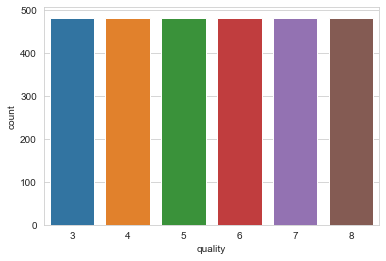

In [35]:
sns.countplot(y_res);

#### The data is now balanced ! Let's start modeling.

I'm going to follow this map in order to choose a model : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.

### Modeling

I'm going to try:
* LinearSCV
* KNeighborsClassifier
* RandomForestClassifier
* LogisticRegression


#### LinearSCV

In [36]:
# 2. Choose the right model and hyperparameters
from sklearn.svm import LinearSVC

np.random.seed(42)

# Instantiate Random Forest Classifier
clf_SVC = LinearSVC()

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training the machine learning model)
clf_SVC.fit(X_train, y_train)

# Evaluate the score (use the patterns the model has learned)
clf_SVC.score(X_test, y_test)

0.6157205240174672

In [37]:
# We'll keep the default hyperparameters
clf_SVC.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

#### Make prediction using `.predict()`

In [38]:
clf_SVC.predict(X_test)

array([5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 7, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 6], dtype=int64)

In [39]:
np.array(y_test)

array([5, 6, 5, 6, 6, 8, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6,
       5, 7, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 6, 5, 7, 5, 6, 5,
       4, 5, 6, 6, 5, 6, 7, 5, 6, 7, 5, 7, 6, 4, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 6, 7,
       7, 5, 5, 5, 6, 5, 5, 8, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       7, 6, 5, 5, 5, 6, 5, 6, 7, 6, 6, 5, 7, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       6, 6, 5, 5, 7, 5, 5, 5, 6, 5, 7, 5, 6, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       7, 5, 6, 6, 6, 5, 6, 6, 5, 4, 6, 5, 6, 4, 6, 6, 7, 6, 5, 6, 5, 7,
       7, 6, 6, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6,
       6, 5, 5, 5, 4, 6, 5, 6, 6], dtype=int64)

In [40]:
# Compare predictions to truth to evaluate the model
y_preds = clf_SVC.predict(X_test)
np.mean(y_preds == y_test)

0.6157205240174672

In [41]:
# 4. Evaluate the model on the training data and test data / 1.0 = 100%
print("Train score: ", clf_SVC.score(X_train, y_train))
print("Test score: ", clf_SVC.score(X_test, y_test))

Train score:  0.6050328227571116
Test score:  0.6157205240174672


#### KNeighborsClassifier

In [42]:
# Choose the right model and hyperparameters
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

# Instantiate Random Forest Classifier
knn = KNeighborsClassifier()

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training the machine learning model)
knn.fit(X_train, y_train)

# Evaluate the score (use the patterns the model has learned)
knn.score(X_test, y_test)

0.5414847161572053

In [43]:
# Compare predictions to truth to evaluate the model
y_preds = knn.predict(X_test)
np.mean(y_preds == y_test)

0.5414847161572053

In [44]:
# Evaluate the model on the training data and test data / 1.0 = 100%
print("Train score: ", knn.score(X_train, y_train))
print("Test score: ", knn.score(X_test, y_test))

Train score:  0.7045951859956237
Test score:  0.5414847161572053


#### RandomForestClassifier

In [45]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Instantiate the model
clf = RandomForestClassifier()

# Split into training & tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model score
clf.score(X_test, y_test)

0.6899563318777293

In [46]:
# Compare predictions to truth to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.6899563318777293

In [47]:
# Evaluate the model on the training data and test data / 1.0 = 100%
print("Train score: ", clf.score(X_train, y_train))
print("Test score: ", clf.score(X_test, y_test))

Train score:  1.0
Test score:  0.6899563318777293


#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

clf_LR = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_LR.fit(X_train, y_train)

clf_LR.score(X_test, y_test)

0.6462882096069869

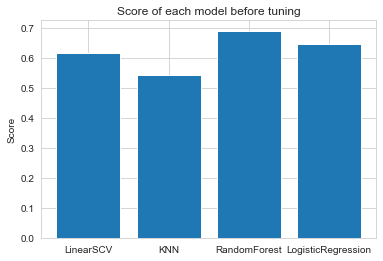

In [49]:
model_score = {"LinearSCV": clf_SVC.score(X_test, y_test),
               "KNN": knn.score(X_test, y_test),
               "RandomForest": clf.score(X_test, y_test),
               "LogisticRegression": clf_LR.score(X_test, y_test)}

fig, ax = plt.subplots()
ax.bar(model_score.keys(), model_score.values())
ax.set(title="Score of each model before tuning",
       ylabel="Score");

Let's tune them to see which model have the most high score.

### Tuning with GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

logisticRegression_grid = {"C": np.logspace(-4, 4, 20),
                           "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

randomForest_grid = {"n_estimators": np.arange(10, 1000, 20),
                     "max_depth": [None, 3, 5, 10],
                     "min_samples_split": np.arange(2, 20, 20),
                     "min_samples_leaf": np.arange(1, 20, 20)}

knn_grid = {"n_neighbors": range(1, 21, 2),
            "weights": ['uniform', 'distance']}

linearSCV_grid = {"C": np.logspace(-4, 4, 20),
                  "verbose": [0, 1]}

np.random.seed(42)

In [51]:
gridsearch_linearSCV = GridSearchCV(LinearSVC(), param_grid=linearSCV_grid, cv=5, verbose=True)

gridsearch_linearSCV.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

KeyboardInterrupt: 

In [ ]:
gridsearch_logistic = GridSearchCV(LogisticRegression(), param_grid=logisticRegression_grid, cv=2, verbose=True)

gridsearch_logistic.fit(X_train, y_train);

In [ ]:
gridsearch_random = GridSearchCV(RandomForestClassifier(), param_grid=randomForest_grid, cv=2, verbose=True)

gridsearch_random.fit(X_train, y_train);

In [54]:
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid, cv=5, verbose=True)

gridsearch_knn.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [55]:
print('Best parameters for LinearSCV are: '), gridsearch_linearSCV.best_params_

Best parameters for LinearSCV are: 


(None, {'C': 1.623776739188721, 'verbose': 1})

In [56]:
print('Best param for LogisticRegression are: '), gridsearch_logistic.best_params_

Best param for LogisticRegression are: 


(None, {'C': 0.615848211066026, 'solver': 'lbfgs'})

In [57]:
print('Best param for RandomForestClassifier are: '), gridsearch_random.best_params_

Best param for RandomForestClassifier are: 


(None,
 {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 210})

In [58]:
print('Best param for KNeighborsClassifier are: '), gridsearch_knn.best_params_

Best param for KNeighborsClassifier are: 


(None, {'n_neighbors': 11, 'weights': 'distance'})

In [52]:
clf_SVC = LinearSVC(C=1.623776739188721, verbose=1)
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
clf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=210)
clf_LR = LogisticRegression(C=0.615848211066026, solver='lbfgs')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# Fit the model to the data (training the machine learning model)
clf_SVC.fit(X_train, y_train)
knn.fit(X_train, y_train)
clf.fit(X_train, y_train)
clf_LR.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=0.615848211066026)

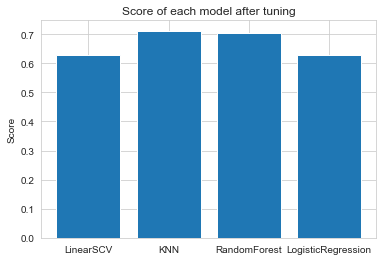

In [55]:
model_score = {"LinearSCV": clf_SVC.score(X_test, y_test),
               "KNN": knn.score(X_test, y_test),
               "RandomForest": clf.score(X_test, y_test),
               "LogisticRegression": clf_LR.score(X_test, y_test)}

fig, ax = plt.subplots()
ax.bar(model_score.keys(), model_score.values())
ax.set(title="Score of each model after tuning",
       ylabel="Score");

In [56]:
print(f'KNN score: ', knn.score(X_test, y_test))
print(f'RandomForest score: ', clf.score(X_test, y_test))

KNN score:  0.7117903930131004
RandomForest score:  0.7030567685589519


## Evaluating our tuned machine learning classifier, beyond accuracy

* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [57]:
# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Confusion matrix end test

We use cross-validation `cross_val_score()` to test our model on several splits.

In [58]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.55458515, 0.59388646, 0.61135371, 0.60964912, 0.5877193 ])

In [61]:
cv_acc = round(np.mean(cv_acc), 2)
cv_acc

0.59

In [63]:
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre

array([nan, nan, nan, nan, nan])

In [64]:
cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = round(np.mean(cv_rec), 2)
cv_recall

nan

In [65]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = round(np.mean(cv_f1), 2)
cv_f1

nan

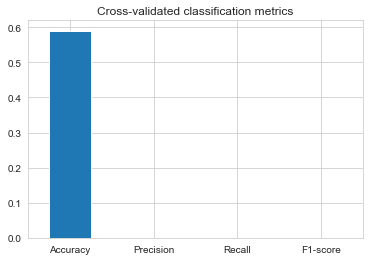

In [66]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False,
                      rot=0);

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.50      0.50      0.50       106
           6       0.46      0.50      0.48        92
           7       0.09      0.09      0.09        23
           8       0.00      0.00      0.00         4

    accuracy                           0.44       229
   macro avg       0.21      0.22      0.21       229
weighted avg       0.42      0.44      0.43       229



# Confusion matrix test

In [ ]:
# "LinearSCV": clf_SVC.score(X_test, y_test),
#                "KNN": knn.score(X_test, y_test),
#                "RandomForest": clf.score(X_test, y_test),
#                "LogisticRegression": clf_LR.score(X_test, y_test)}

In [116]:
y_preds = gridsearch_linearSCV.predict(X_test)
y_preds

array([6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 6], dtype=int64)

In [118]:
print(confusion_matrix(y_test, y_preds))

[[ 0  3  3  0  0]
 [ 0 75 19  2  0]
 [ 0 34 65  0  0]
 [ 0  2 21  3  0]
 [ 0  0  1  1  0]]


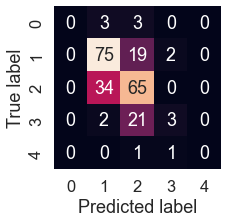

In [119]:
# Improve visualisaiton
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    # if it doesn't fit
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds);

In [120]:
from sklearn.metrics import multilabel_confusion_matrix

In [121]:
print(multilabel_confusion_matrix(y_test, y_preds))

[[[223   0]
  [  6   0]]

 [[ 94  39]
  [ 21  75]]

 [[ 86  44]
  [ 34  65]]

 [[200   3]
  [ 23   3]]

 [[227   0]
  [  2   0]]]


In [137]:
y_preds = clf_SVC.predict(X_test)

In [141]:
y_preds.shape

(229,)

In [142]:
y_test.shape

(229,)

In [154]:
y_preds

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [153]:
df_test_test = pd.DataFrame(y_preds)
df_test_test.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [152]:
pd.crosstab(y_test, y_preds)

col_0,5,6,7
quality,,,
4,7,5,0
5,83,18,1
6,31,57,5
7,3,16,1
8,1,1,0


In [123]:
from sklearn.metrics import plot_confusion_matrix

In [126]:
class_names = y.target_names

AttributeError: 'Series' object has no attribute 'target_names'

In [148]:
classifier_test = clf_SVC.fit(X_train, y_train)

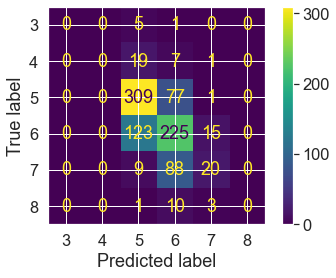

In [172]:
disp = plot_confusion_matrix(clf_SVC.fit(X_train, y_train), X_train, y_train,
                                 display_labels=y.unique().sort())
plt.show();

In [170]:
testaa = y.unique()
print(testaa)

[5 6 7 4 8 3]


In [167]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [137]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,1.916923,0.61,0.04,0.405465,-2.864704,1.609438,2.302585,0.99525,3.42,-0.510826,9.500000
1081,1.931521,0.84,0.21,1.410987,-2.603690,2.772589,4.174387,0.99842,3.53,-0.328504,9.233333
291,1.945910,0.58,0.12,0.641854,-2.396896,3.526361,4.820282,0.99560,3.44,-0.733969,10.500000
538,2.054124,0.48,0.68,0.530628,-0.879477,2.639057,3.465736,0.99656,3.09,0.058269,9.100000
367,2.525729,0.60,0.49,1.458615,-2.302585,1.609438,2.639057,1.00100,3.25,-0.301105,11.900000


In [141]:
y_train.value_counts().sort_index()

3      6
4     27
5    387
6    363
7    117
8     14
Name: quality, dtype: int64

In [144]:
y_test.value_counts().sort_index()

4     6
5    96
6    99
7    26
8     2
Name: quality, dtype: int64

In [145]:
y_train.shape, y_test.shape

((914,), (229,))

Let's try this : https://stackoverflow.com/questions/53886370/multi-class-multi-label-confusion-matrix-with-sklearn

> What you need to do is to generate multiple binary confusion matrices (since essentially what you have are multiple binary labels)

In [109]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = np.array([[0,0,1], [1,1,0],[0,1,0]])
y_pred = np.array([[0,0,1], [1,0,1],[1,0,0]])

labels = ["A", "B", "C"]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label A:
[[1 1]
 [0 1]]
Confusion matrix for label B:
[[1 0]
 [2 0]]
Confusion matrix for label C:
[[1 1]
 [0 1]]


In [113]:
y_true[:, label_col]

array([1, 0, 0])

In [125]:
y_true = np.array(clf_SVC.predict(X_test))
y_pred = np.array(y_test)

labels = ["3", "4", "5", "6", "7", "8"]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:]
    y_pred_label = y_pred[:]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)
    
for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label 3:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]
Confusion matrix for label 4:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]
Confusion matrix for label 5:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]
Confusion matrix for label 6:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]
Confusion matrix for label 7:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]
Confusion matrix for label 8:
[[ 0  0  0  0  0]
 [ 7 83 31  3  1]
 [ 5 18 57 16  1]
 [ 0  1  5  1  0]
 [ 0  0  0  0  0]]


In [129]:
y_true[label_col]

6

In [130]:
y_true[:]

array([6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 7, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6,
       7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 7, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 6], dtype=int64)

In [114]:
X_test.shape

(229, 11)

In [127]:
y_true.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [106]:
y_true[:, label_col]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [98]:
y_preds_test = clf_SVC.predict(X_test)
y_preds_test.shape

(229,)

In [99]:
y_test.shape

(229,)

In [100]:
print(confusion_matrix(y_test, y_preds_test))

[[ 0  7  5  0  0]
 [ 0 83 18  1  0]
 [ 0 31 57  5  0]
 [ 0  3 16  1  0]
 [ 0  1  1  0  0]]


In [ ]:
disp = plot_confusion_matrix(clf_SVC.fit(X_train, y_train), X_train, y_train,
                                 display_labels=y.unique().sort())
plt.show();

# Confusion matrix end test

We use cross-validation `cross_val_score()` to test our model on several splits.